# Cose da fare:

* Ottieni il dataset "from reward"
* Fitta poisson con unico threshold, 6 drift per animale e vedi che succede (Optim? JuMP?)
* Approccio normativo

In [1]:
using DataFrames
using Plots
plotlyjs(bottom_margin = 5mm, grid = false)
using Colors
using Optim
using Interact
using Feather
using GLM
import BuildTable
using Query
using StatPlots

INFO: Recompiling stale cache file /Users/pietro/.julia/lib/v0.5/GLM.ji for module GLM.
INFO: Recompiling stale cache file /Users/pietro/.julia/lib/v0.5/ExcelReaders.ji for module ExcelReaders.


In [2]:
datapoke = Feather.read("data/pokesallgen.feather"; nullable = false);
datastreak = Feather.read("data/streaksallgen.feather"; nullable = false);

In [9]:
CSV.write("data/pokes_ISAAC_SERT.csv", datapoke)
CSV.write("data/streaks_ISAAC_SERT.csv", datastreak)

CSV.Sink(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        null: ""
        dateformat: Base.Dates.DateFormat(Base.Dates.Slot[Base.Dates.DelimitedSlot{Base.Dates.Year}(Base.Dates.Year,'y',4,"-"),Base.Dates.DelimitedSlot{Base.Dates.Month}(Base.Dates.Month,'m',2,"-"),Base.Dates.DelimitedSlot{Base.Dates.Day}(Base.Dates.Day,'d',2,r"(?=\s|$)")],"","english"),IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1),"data/streaks_ISAAC_SERT.csv",265,true,String["Date","MouseID","StreakNumber","Side","Stim","BoxID","RewardProb","FlippingGamma","Rewardsize","Barrier"  …  "LastReward","NumPokes","AfterLast","StartHigh","EndHigh","NumRew","NumOms","TimeStart","TimeEnd","Travel"],false)

In [3]:
#pokes = CSV.read("pokes_ISAAC_SERT.csv", nullable = false, weakrefstrings = false)


In [ ]:
#CSV.write(datapoke)

In [4]:

data = Dict()
data[:pokes] = DataFrame()
data[:streaks] = DataFrame()
for key in names(datapoke)
    if key != :Comments
        data[:pokes][key] = convert(Array,datapoke[key])
    end
end
for key in names(datastreak)
    if key != :Comments
        data[:streaks][key] = convert(Array,datastreak[key])
    end
end

In [11]:
reload("BuildTable")

0-element Array{Any,1}

In [5]:
s = BuildTable.getpokes([BuildTable.vgat]);

In [12]:
t = BuildTable.getstreaks(s);

In [11]:
#data[:streaks][1,:Gen].value == "wt"
head(data[:streaks])
data[:streaks][:OmsBefore] = data[:streaks][:LastReward]-data[:streaks][:NumRew];

In [6]:
writetable("pokes_poisson.csv",s)

In [7]:
writetable("streaks_poisson.csv",t)

In [13]:
head(t)

6×23 DataFrames.DataFrame
│ Row │ Date     │ MouseID │ StreakNumber │ Side │ Stim │ BoxID │ RewardProb │
├─────┼──────────┼─────────┼──────────────┼──────┼──────┼───────┼────────────┤
│ 1   │ 161205.0 │ "L01"   │ 1            │ 1.0  │ 0.0  │ 2.0   │ 30.0       │
│ 2   │ 161205.0 │ "L01"   │ 2            │ 0.0  │ 0.0  │ 2.0   │ 30.0       │
│ 3   │ 161205.0 │ "L01"   │ 3            │ 1.0  │ 0.0  │ 2.0   │ 30.0       │
│ 4   │ 161205.0 │ "L01"   │ 4            │ 0.0  │ 0.0  │ 2.0   │ 30.0       │
│ 5   │ 161205.0 │ "L01"   │ 5            │ 1.0  │ 0.0  │ 2.0   │ 30.0       │
│ 6   │ 161205.0 │ "L01"   │ 6            │ 0.0  │ 0.0  │ 2.0   │ 30.0       │

│ Row │ FlippingGamma │ DayNum │ Protocollo │ Gen    │ ValidDay │ Choice │
├─────┼───────────────┼────────┼────────────┼────────┼──────────┼────────┤
│ 1   │ 30.0          │ 1.0    │ 0.0        │ "vgat" │ true     │ 3.0    │
│ 2   │ 30.0          │ 1.0    │ 0.0        │ "vgat" │ true     │ 3.0    │
│ 3   │ 30.0          │ 1.0    │ 0.0        │ "vgat" │ true     │ 3.0    │
│ 4   │ 30.0          │ 1.0    │ 0.0        │ "vgat" │ true     │ 3.0    │
│ 5   │ 30.0          │ 1.0    │ 0.0        │ "vgat" │ true     │ 3.0    │
│ 6   │ 30.0          │ 1.0    │ 0.0        │ "vgat" │ true     │ 3.0    │

│ Row │ LastReward │ NumPokes │ AfterLast │ StartHigh │ EndHigh │ NumRew │
├─────┼────────────┼──────────┼───────────┼───────────┼─────────┼────────┤
│ 1   │ 3          │ 4        │ 1         │ true      │ true    │ 2.0    │
│ 2   │ 0          │ 6        │ 6         │ false     │ false   │ 0.0    │
│ 3   │ 16         │ 20       │ 4         │ true      │ true    │ 4.0    │
│ 4   │ 0          │ 2        │ 2         │ false     │ false   │ 0.0    │
│ 5   │ 19         │ 24       │ 5         │ true      │ false   │ 6.0    │
│ 6   │ 0          │ 4        │ 4         │ true      │ false   │ 0.0    │

│ Row │ NumOms │ TimeStart │ TimeEnd │ BlockNumber │
├─────┼────────┼───────────┼─────────┼─────────────┤
│ 1   │ 2.0    │ 56.891    │ 57.622  │ 1           │
│ 2   │ 6.0    │ 63.088    │ 70.673  │ 2           │
│ 3   │ 16.0   │ 76.102    │ 88.01   │ 3           │
│ 4   │ 2.0    │ 93.599    │ 94.623  │ 4           │
│ 5   │ 18.0   │ 105.32    │ 116.448 │ 5           │
│ 6   │ 4.0    │ 123.902   │ 126.162 │ 6           │

In [4]:
t[:After1] = fill(false,size(t,1))
t[2:end, :After1] = (t[1:end-1,:LastReward] .==1)
#t[:AfterWeird] = t[:AfterWeird]&(t[:Protocollo] .== [1])
t[:After2] = fill(false,size(t,1))
t[3:end, :After2] = (t[1:end-2,:LastReward] .==1)
#t[:AfterSide] = t[:AfterSide]&(t[:Protocollo] .== [1])
t[:After3] = fill(false,size(t,1))
t[4:end, :After3] = (t[1:end-3,:LastReward] .==1)
t[:After4] = fill(false,size(t,1))
t[5:end, :After4] = (t[1:end-4,:LastReward] .==1)
#t[:After] = t[:After]&(t[:Protocollo] .== [1])


cs = Dict()
cs[:ValidDay] = t -> t
cs[:StreakNumber] = t -> (10 < t <= 100)
cs[:DayNum] = t-> (t>5)
#cs[:StartHigh] = [false]
cs[:Protocollo] = [0]
cs[:LastReward] = t -> (t == 0)
#cs[:MouseID] = ["L01"]
#cs[:BlockNumber] = t -> (t >=5)
#cs[:BlockNumber] = t -> (t>5)
#cs[:Gen] = ["wt", "acc_h"]
#cs[:Travel] = t-> t >0
selected_data = AnTools.choose_data(t,cs);
#selected_data[:ManyRwd] = (selected_data[:NumRew] .> quantile(selected_data[:NumRew], 0.5))
selected_data[:fake] = zeros(size(selected_data,1));
n = 3
selected_data[:BinnedBlock] = convert(Array{Float64},div.(selected_data[:BlockNumber],[n])*n);

In [21]:
using Query, DataFrames

df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,5,2])

x = @from i in df begin
    @where i.age>50
    @select {i.name, i.children}
    @collect DataFrame
end

println(x)
df[:name]

1×2 DataFrames.DataFrame
│ Row │ name   │ children │
├─────┼────────┼──────────┤
│ 1   │ "Kirk" │ 2        │


3-element DataArrays.DataArray{String,1}:
 "John" 
 "Sally"
 "Kirk" 

In [74]:
x = @from i in t begin
    @where i.ValidDay == true  &&
            (10 < i.StreakNumber < 100) &&
            (i.Choice in [3.,4.]) &&
            (i.LastReward == 1)
    @select i
    @collect DataFrame
end;

In [78]:
#reload("StatPlots")
#s[:Duration] = s[:PokeOut]-s[:PokeIn]
#pool!(selected_data,:StartHigh)
#pool!(t,[:AfterLast, :LastReward])
#selected_data[:BlockNumber] = convert(Vector{Float64},selected_data[:BlockNumber]) 
gr(grid = false, size = (800,400))
s = fill(plot(),())
using Interact
@manipulate for span in 0:0.05:1
    df = StatPlots.groupapply(:AfterLast,x,:BlockNumber;
    compute_error = (:across,:MouseID), group = [:Choice, :Protocollo], axis_type = :continuous, span = span);
    s[:] = plot(df, linestyle = [:dash :dash :solid :solid], color = [:blue :red], xlims = (0,40))
end

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.5, nactions=1),"span",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.05"=>0.05,"0.1"=>0.1,"0.15"=>0.15,"0.2"=>0.2,"0.25"=>0.25,"0.3"=>0.3,"0.35"=>0.35,"0.4"=>0.4,"0.45"=>0.45…),Dict(1.0=>"1.0",0.95=>"0.95",0.3=>"0.3",0.45=>"0.45",0.25=>"0.25",0.35=>"0.35",0.7=>"0.7",0.0=>"0.0",0.85=>"0.85",0.15=>"0.15"…)),Any[],Any[],true,"horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 40 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:0.8; stroke-opacity:1; fill:none" stroke-dasharray="8, 5" points="
 49.2187,219.391 66.0306,204.813 82.8425,192.858 99.6545,183.214 116.466,175.674 133.278,169.788 150.09,165.389 166.902,164.432 183.714,164.032 200.526,159.411 
 217.338,150.717 234.15,139.724 250.962,128.016 267.774,116.206 284.585,108.678 301.397,105.928 318.209,105.474 335.021,106.151 351.833,108.738 368.645,110.419 
 385.457,111.062 402.269,109.613 419.081,107.158 435.893,105.691 452.705,104.608 469.516,103.095 486.328,101.723 503.14,100.565 519.952,98.0345 536.764,95.3454 
 553.576,92.4205 570.388,90.6959 587.2,89.6848 604.012,88.1662 620.824,86.0676 637.635,84.5248 654.447,83.3748 671.259,83.1097 688.071,83.7835 704.883,85.1257 
 721.695,86.1233 738.507,87.2604 755.319,87.4771 772.131,86.8262 788.943,85.8856 805.755,85.2937 822.566,84.6597 839.378,83.6482 856.19,82.8211 873.002,82.3692 
 889.814,82.0037 906.626,81.8232 923.438,81.4735 940.25,81.4028 957.062,81.4427 973.874,81.6132 990.686,81.9158 1007.5,82.3031 1024.31,82.8718 1041.12,83.6838 
 1057.93,84.7016 1074.75,85.9665 1091.56,87.4132 1108.37,89.056 1125.18,90.7459 1141.99,92.4676 1158.8,94.25 1175.62,96.1131 1192.43,98.1861 1209.24,100.388 
 1226.05,102.7 1242.86,105.205 1259.68,107.897 1276.49,107.475 1293.3,123.641 1310.11,127.553 1326.92,131.574 1343.74,135.705 1360.55,139.945 1377.36,87.12 
 1394.17,87.0776 1410.98,86.9257 1427.8,112.764 1444.61,111.286 1461.42,109.64 1478.23,107.822 1495.04,105.827 
 "/>
<polygon clip-path="url(#clip02)" points="
49.2187,235.339 66.0306,220.934 82.8425,210.012 99.6545,201.52 116.466,194.914 133.278,189.531 150.09,185.097 166.902,183.416 183.714,181.075 200.526,174.653 
 217.338,164.963 234.15,154.682 250.962,146.143 267.774,139.036 284.585,136.148 301.397,136.647 318.209,137.309 335.021,137.424 351.833,137.756 368.645,136.957 
 385.457,135.743 402.269,133.403 419.081,130.986 435.893,129.918 452.705,129.513 469.516,128.967 486.328,128.724 503.14,128.712 519.952,127.548 536.764,126.42 
 553.576,124.928 570.388,123.777 587.2,122.463 604.012,120.191 620.824,116.588 637.635,112.92 654.447,109.698 671.259,107.519 688.071,106.394 704.883,106.146 
 721.695,105.609 738.507,105.454 755.319,104.803 772.131,103.81 788.943,103.158 805.755,103.189 822.566,103.45 839.378,103.467 856.19,103.639 873.002,104.161 
 889.814,104.679 906.626,105.205 923.438,105.483 940.25,105.984 957.062,106.506 973.874,107.087 990.686,107.718 1007.5,108.346 1024.31,109.067 1041.12,109.952 
 1057.93,110.999 1074.75,112.229 1091.56,113.55 1108.37,114.98 1125.18,116.362 1141.99,117.716 1158.8,119.079 1175.62,120.49 1192.43,122.192 1209.24,124.118 
 1226.05,126.305 1242.86,128.948 1259.68,132.068 1276.49,138.299 1293.3,159.678 1310.11,165.501 1326.92,171.814 1343.74,178.619 1360.55,185.913 1377.36,132.505 
 1394.17,131.338 1410.98,129.917 1427.8,168.801 1444.61,165.334 1461.42,161.391 1478.23,156.954 1495.04,152.004 1495.04,59.6507 1478.23,58.6903 1461.42,57.8888 
 1444.61,57.2375 1427.8,56.7272 1410.98,43.9341 1394.17,42.8173 1377.36,41.7353 1360.55,93.977 1343.74,92.7917 1326.92,91.3349 1310.11,89.6044 1293.3,87.6031 
 1276.49,76.6504 1259.68,83.7261 1242.86,81.4627 1226.05,79.095 1209.24,76.6576 1192.43,74.1805 1175.62,71.7361 1158.8,69.4206 1141.99,67.2193 1125.18,65.1297 
 1108.37,63.132 1091.56,61.2766 1074.75,59.7041 1057.93,58.4042 1041.12,57.4154 1024.31,56.6762 1007.5,56.2599 990.686,56.114 973.874,56.1394 957.062,56.3792 
 940.25,56.8211 923.438,57.4637 906.626,58.4414 889.814,59.3281 873.002,60.5779 856.19,62.0032 839.378,63.8294 822.566,65.8689 805.755,67.3981 788.943,68.6127 
 772.131,69.8428 755.319,70.1512 738.507,69.0669 721.695,66.6371 704.883,64.1053 688.071,61.173 671.259,58.7 654.447,57.0517 637.635,56.1301 620.824,55.54

In [83]:
savefig(s[1], "learning.html")

In [79]:
display(s[1])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 40 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:0.8; stroke-opacity:1; fill:none" stroke-dasharray="8, 5" points="
 49.2187,196.145 66.0306,184.908 82.8425,174.257 99.6545,164.182 116.466,154.688 133.278,145.781 150.09,137.448 166.902,129.709 183.714,122.563 200.526,115.991 
 217.338,109.96 234.15,104.427 250.962,99.3355 267.774,94.6418 284.585,90.2138 301.397,86.442 318.209,83.2167 335.021,80.3702 351.833,77.7164 368.645,75.2744 
 385.457,72.9523 402.269,70.6735 419.081,69.1291 435.893,67.7557 452.705,66.6893 469.516,65.857 486.328,64.7065 503.14,62.8249 519.952,60.8465 536.764,58.8521 
 553.576,57.1508 570.388,55.6911 587.2,54.5391 604.012,53.6947 620.824,53.2969 637.635,52.9593 654.447,52.4183 671.259,51.7853 688.071,51.2144 704.883,50.3978 
 721.695,49.3494 738.507,48.4049 755.319,47.5771 772.131,46.9195 788.943,46.3503 805.755,45.7922 822.566,45.0769 839.378,44.2552 856.19,43.5373 873.002,42.9846 
 889.814,42.6173 906.626,42.368 923.438,42.2419 940.25,42.3089 957.062,42.4859 973.874,42.783 990.686,43.188 1007.5,43.704 1024.31,44.3408 1041.12,45.1791 
 1057.93,46.1122 1074.75,47.1708 1091.56,48.3868 1108.37,49.7552 1125.18,51.137 1141.99,52.6278 1158.8,54.242 1175.62,56.0093 1192.43,58.0605 1209.24,60.318 
 1226.05,62.7758 1242.86,65.5556 1259.68,68.6029 1276.49,64.4962 1293.3,87.3535 1310.11,91.3715 1326.92,95.4824 1343.74,99.6851 1360.55,103.978 1377.36,50.6128 
 1394.17,51.3071 1410.98,51.917 1427.8,77.7988 1444.61,76.4144 1461.42,74.8137 1478.23,72.9886 1495.04,70.9307 
 "/>
<polygon clip-path="url(#clip02)" points="
49.2187,214.181 66.0306,202.893 82.8425,192.385 99.6545,182.605 116.466,173.526 133.278,165.124 150.09,157.356 166.902,150.226 183.714,143.72 200.526,137.798 
 217.338,132.406 234.15,127.506 250.962,123.016 267.774,118.851 284.585,114.853 301.397,111.512 318.209,108.663 335.021,106.224 351.833,104 368.645,101.954 
 385.457,100.177 402.269,98.4303 419.081,97.5892 435.893,96.9582 452.705,96.5845 469.516,96.389 486.328,95.7559 503.14,94.2729 519.952,92.4103 536.764,90.2869 
 553.576,88.2305 570.388,86.1397 587.2,84.2158 604.012,82.4646 620.824,80.9144 637.635,79.3755 654.447,77.61 671.259,75.7835 688.071,74.1197 704.883,72.4413 
 721.695,70.7347 738.507,69.3871 755.319,68.4125 772.131,67.8192 788.943,67.513 805.755,67.2781 822.566,66.8635 839.378,66.2922 856.19,65.8563 873.002,65.6715 
 889.814,65.6892 906.626,65.863 923.438,66.2127 940.25,66.8252 957.062,67.564 973.874,68.4266 990.686,69.3842 1007.5,70.4221 1024.31,71.5323 1041.12,72.8104 
 1057.93,74.1593 1074.75,75.5581 1091.56,77.0404 1108.37,78.5895 1125.18,80.0327 1141.99,81.4808 1158.8,82.9495 1175.62,84.4616 1192.43,86.2256 1209.24,88.1485 
 1226.05,90.2458 1242.86,92.72 1259.68,95.5209 1276.49,99.6946 1293.3,124.87 1310.11,130.36 1326.92,136.262 1343.74,142.592 1360.55,149.361 1377.36,97.2885 
 1394.17,97.0076 1410.98,96.5453 1427.8,138.926 1444.61,137.053 1461.42,134.811 1478.23,132.185 1495.04,129.158 1495.04,12.7032 1478.23,13.7922 1461.42,14.8163 
 1444.61,15.776 1427.8,16.6718 1410.98,7.28864 1394.17,5.60664 1377.36,3.93701 1360.55,58.5953 1343.74,56.7781 1326.92,54.7032 1310.11,52.3835 1293.3,49.8372 
 1276.49,29.2977 1259.68,41.6849 1242.86,38.3913 1226.05,35.3058 1209.24,32.4874 1192.43,29.8954 1175.62,27.557 1158.8,25.5345 1141.99,23.7748 1125.18,22.2413 
 1108.37,20.9208 1091.56,19.7332 1074.75,18.7835 1057.93,18.0652 1041.12,17.5479 1024.31,17.1492 1007.5,16.9858 990.686,16.9918 973.874,17.1394 957.062,17.4078 
 940.25,17.7927 923.438,18.271 906.626,18.873 889.814,19.5454 873.002,20.2976 856.19,21.2182 839.378,22.2181 822.566,23.2903 805.755,24.3063 788.943,25.1876 
 772.131,26.0197 755.319,26.7417 738.507,27.4227 721.695,27.9641 704.883,28.3543 688.071,28.3091 671.259,27.7871 654.447,27.2267 637.635,26.543 620.824,25.6795 
 60

In [105]:
head(selected_data)

6×24 DataFrames.DataFrame
│ Row │ Date     │ MouseID │ StreakNumber │ Side │ Stim │ BoxID │ RewardProb │
├─────┼──────────┼─────────┼──────────────┼──────┼──────┼───────┼────────────┤
│ 1   │ 161205.0 │ "L02"   │ 1            │ 1.0  │ 0.0  │ 2.0   │ 90.0       │
│ 2   │ 161205.0 │ "L02"   │ 2            │ 0.0  │ 0.0  │ 2.0   │ 90.0       │
│ 3   │ 161205.0 │ "L02"   │ 3            │ 1.0  │ 0.0  │ 2.0   │ 90.0       │
│ 4   │ 161205.0 │ "L02"   │ 4            │ 0.0  │ 0.0  │ 2.0   │ 90.0       │
│ 5   │ 161205.0 │ "L02"   │ 5            │ 1.0  │ 0.0  │ 2.0   │ 90.0       │
│ 6   │ 161205.0 │ "L02"   │ 6            │ 0.0  │ 0.0  │ 2.0   │ 90.0       │

│ Row │ FlippingGamma │ DayNum │ Protocollo │ Gen    │ ValidDay │ LastReward │
├─────┼───────────────┼────────┼────────────┼────────┼──────────┼────────────┤
│ 1   │ 90.0          │ 1.0    │ 1.0        │ "vgat" │ true     │ 0          │
│ 2   │ 90.0          │ 1.0    │ 1.0        │ "vgat" │ true     │ 1          │
│ 3   │ 90.0          │ 1.0    │ 1.0        │ "vgat" │ true     │ 1          │
│ 4   │ 90.0          │ 1.0    │ 1.0        │ "vgat" │ true     │ 1          │
│ 5   │ 90.0          │ 1.0    │ 1.0        │ "vgat" │ true     │ 1          │
│ 6   │ 90.0          │ 1.0    │ 1.0        │ "vgat" │ true     │ 1          │

│ Row │ NumPokes │ AfterLast │ StartHigh │ EndHigh │ NumRew │ NumOms │
├─────┼──────────┼───────────┼───────────┼─────────┼────────┼────────┤
│ 1   │ 2        │ 2         │ false     │ true    │ 0.0    │ 2.0    │
│ 2   │ 1        │ 0         │ true      │ false   │ 1.0    │ 0.0    │
│ 3   │ 1        │ 0         │ true      │ false   │ 1.0    │ 0.0    │
│ 4   │ 4        │ 3         │ true      │ true    │ 1.0    │ 3.0    │
│ 5   │ 2        │ 1         │ true      │ true    │ 1.0    │ 1.0    │
│ 6   │ 5        │ 4         │ true      │ true    │ 1.0    │ 4.0    │

│ Row │ TimeStart │ TimeEnd │ BlockNumber │ fake │ cv    │
├─────┼───────────┼─────────┼─────────────┼──────┼───────┤
│ 1   │ 39.771    │ 47.807  │ 1           │ 0.0  │ false │
│ 2   │ 52.772    │ 53.786  │ 2           │ 0.0  │ true  │
│ 3   │ 56.957    │ 57.86   │ 3           │ 0.0  │ true  │
│ 4   │ 61.782    │ 63.844  │ 4           │ 0.0  │ true  │
│ 5   │ 66.557    │ 68.46   │ 5           │ 0.0  │ true  │
│ 6   │ 74.496    │ 76.706  │ 6           │ 0.0  │ true  │

In [61]:
savefig(plt,"nolapse.png")

In [17]:
cs = Dict()
cs[:ValidDay] = t -> t
cs[:StreakNumber] = t -> (10< t <= 100)
cs[:DayNum] = t-> (t>5)
#cs[:StartHigh] = [false]
#cs[:Protocollo] = [0]
#cs[:LastReward] = t -> (t==1)
#cs[:BlockNumber] = t -> (t>=5)
#cs[:Gen] = ["wt", "acc_h"]
#cs[:Travel] = t-> t >0
selected_data = AnTools.choose_data(t,cs);
selected_data[:ManyRwd] = (selected_data[:NumRew] .> 2)#quantile(selected_data[:NumRew], 0.5))
selected_data[:fake] = zeros(size(selected_data,1));

In [18]:
typeof(selected_data[:BlockNumber])<:PooledDataArray

false

In [33]:
#reload("StatPlots")
pool!(selected_data,[:LastReward,:AfterLast, :Protocollo,:BlockNumber, :FlippingGamma])
g = StatPlots.groupapply(selected_data,:BlockNumber, :AfterLast; across = :MouseID, group = :Protocollo, axis_type = :discrete)
plt = plot(g;
line = :scatter,
xaxis = ("Omissions after last reward",(-0.5,60),font(15)),
yaxis = ("probability density", (0,10), font(12)), legendfont = font(15),
grid = false, seriescolor = ["red" "green"])

In [100]:
cvbool(x) = x? 1:0
selected_data[:cv] = cvbool.(selected_data[:StartHigh]);

In [17]:
g

StatPlots.GroupedError{Int64,AbstractString}(Array{Int64,1}[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],[0,1,2,3]],Array{Float64,1}[[4.49344,3.72706,4.40582,4.91841,5.00555,5.83241,5.34457,5.48289,5.1625,6.32483,5.79167,7.0,5.75,6.33333,8.33333],[4.37572,2.58357,4.00409,5.0119]],Array{Float64,1}[[0.358447,0.3443,0.331678,0.252724,0.233469,0.485354,0.491181,0.330611,0.40444,0.470277,1.53263,1.73205,1.25,1.20185,2.02759],[0.505456,0.242982,0.279959,0.245615]],AbstractString["0.0","1.0"],:discrete)

In [4]:
added_col = by(selected_data, [:MouseID, :Stim, :Protocol]) do df
    DataFrame(mal = mean(df[:AfterLast]))
end
selected_data = join(selected_data,added_col, on = [:MouseID, :Stim, :Protocol])
selected_data[:NormAfterLast] = (selected_data[:AfterLast]+1)./(selected_data[:mal]+1);

In [61]:
plot_funcb = togglebuttons([AnTools.myplot!,AnTools.myscatter!])
xb = togglebuttons(names(selected_data))
yb = togglebuttons(vcat(names(selected_data),[AnTools.gethist,AnTools.getcum]))
z1b = togglebuttons(names(selected_data))
z2b = togglebuttons(names(selected_data))
plot_func = signal(plot_funcb)
x = signal(xb)
y = signal(yb)
z1 = signal(z1b)
z2 = signal(z2b)
for button in [plot_funcb,xb, yb, z1b,z2b]
    display(button)
end

Interact.Options{:ToggleButtons,Any}(Signal{Any}(AnTools.myplot!, nactions=0),"",AnTools.myplot!,"AnTools.myplot!",Interact.OptionDict(Any["AnTools.myplot!","AnTools.myscatter!"],Dict{Any,Any}(Pair{Any,Any}("AnTools.myplot!",AnTools.myplot!),Pair{Any,Any}("AnTools.myscatter!",AnTools.myscatter!))),Any[],Any[])

Interact.Options{:ToggleButtons,Any}(Signal{Any}(Date, nactions=0),"",:Date,"Date",Interact.OptionDict(Any["Date","MouseID","StreakNumber","Side","Stim","BoxID","RewardProb","FlippingGamma","DayNum","Protocollo"  …  "LastReward","NumPokes","AfterLast","StartHigh","EndHigh","NumRew","NumOms","TimeStart","TimeEnd","fake"],Dict{Any,Any}(Pair{Any,Any}("TimeEnd",:TimeEnd),Pair{Any,Any}("LastReward",:LastReward),Pair{Any,Any}("BoxID",:BoxID),Pair{Any,Any}("EndHigh",:EndHigh),Pair{Any,Any}("Date",:Date),Pair{Any,Any}("StartHigh",:StartHigh),Pair{Any,Any}("NumRew",:NumRew),Pair{Any,Any}("AfterLast",:AfterLast),Pair{Any,Any}("fake",:fake),Pair{Any,Any}("NumPokes",:NumPokes)…)),Any[],Any[])

Interact.Options{:ToggleButtons,Any}(Signal{Any}(Date, nactions=0),"",:Date,"Date",Interact.OptionDict(Any["Date","MouseID","StreakNumber","Side","Stim","BoxID","RewardProb","FlippingGamma","DayNum","Protocollo"  …  "AfterLast","StartHigh","EndHigh","NumRew","NumOms","TimeStart","TimeEnd","fake","AnTools.gethist","AnTools.getcum"],Dict{Any,Any}(Pair{Any,Any}("TimeEnd",:TimeEnd),Pair{Any,Any}("LastReward",:LastReward),Pair{Any,Any}("BoxID",:BoxID),Pair{Any,Any}("EndHigh",:EndHigh),Pair{Any,Any}("Date",:Date),Pair{Any,Any}("StartHigh",:StartHigh),Pair{Any,Any}("NumRew",:NumRew),Pair{Any,Any}("AfterLast",:AfterLast),Pair{Any,Any}("fake",:fake),Pair{Any,Any}("NumPokes",:NumPokes)…)),Any[],Any[])

Interact.Options{:ToggleButtons,Any}(Signal{Any}(Date, nactions=0),"",:Date,"Date",Interact.OptionDict(Any["Date","MouseID","StreakNumber","Side","Stim","BoxID","RewardProb","FlippingGamma","DayNum","Protocollo"  …  "LastReward","NumPokes","AfterLast","StartHigh","EndHigh","NumRew","NumOms","TimeStart","TimeEnd","fake"],Dict{Any,Any}(Pair{Any,Any}("TimeEnd",:TimeEnd),Pair{Any,Any}("LastReward",:LastReward),Pair{Any,Any}("BoxID",:BoxID),Pair{Any,Any}("EndHigh",:EndHigh),Pair{Any,Any}("Date",:Date),Pair{Any,Any}("StartHigh",:StartHigh),Pair{Any,Any}("NumRew",:NumRew),Pair{Any,Any}("AfterLast",:AfterLast),Pair{Any,Any}("fake",:fake),Pair{Any,Any}("NumPokes",:NumPokes)…)),Any[],Any[])

Interact.Options{:ToggleButtons,Any}(Signal{Any}(Date, nactions=0),"",:Date,"Date",Interact.OptionDict(Any["Date","MouseID","StreakNumber","Side","Stim","BoxID","RewardProb","FlippingGamma","DayNum","Protocollo"  …  "LastReward","NumPokes","AfterLast","StartHigh","EndHigh","NumRew","NumOms","TimeStart","TimeEnd","fake"],Dict{Any,Any}(Pair{Any,Any}("TimeEnd",:TimeEnd),Pair{Any,Any}("LastReward",:LastReward),Pair{Any,Any}("BoxID",:BoxID),Pair{Any,Any}("EndHigh",:EndHigh),Pair{Any,Any}("Date",:Date),Pair{Any,Any}("StartHigh",:StartHigh),Pair{Any,Any}("NumRew",:NumRew),Pair{Any,Any}("AfterLast",:AfterLast),Pair{Any,Any}("fake",:fake),Pair{Any,Any}("NumPokes",:NumPokes)…)),Any[],Any[])

In [62]:
colori = [colorant"#E24A33", colorant"#348ABD", colorant"#988ED5", colorant"#777777",
    colorant"#FBC15E",colorant"#8EBA42", colorant"#FFB5B8"]
fig = plot()
pool!(selected_data,[:LastReward,:AfterLast])
AnTools.analyze_data(fig, selected_data,x.value,y.value,[z1.value,z2.value];
errorbar = :MouseID, plot_func = AnTools.myplot!)


#s = map((traces, x,y) -> plot(traces,Layout(;#title="Omission Plot",
#xaxis=attr(title=string(x), showgrid=true),
#yaxis_title=string(y), yaxis_showgrid=true)),traces,x,y)

#s = plot(traces.value,l)
#gui(fig)

LoadError: LoadError: BoundsError: attempt to access 1-element Array{Any,1} at index [2]
while loading In[62], in expression starting on line 5

In [190]:
cs = Dict()
#cs[:ValidDay] = t -> t
cs[:StreakNumber] = t -> (10 <= t <= 100)
cs[:BlockNumber] = t -> (t>10)
cs[:StartHigh] = t->t
#cs[:LastReward] = t -> (t>=1)
#cs[:Gen] = ["wt"]
#cs[:Travel] = t-> t >0
selected_data = AnTools.choose_data(t,cs);
#selected_data[:ManyRwd] = (selected_data[:NumRew] .> quantile(selected_data[:NumRew], 0.5))
selected_data[:fake] = zeros(size(selected_data,1));


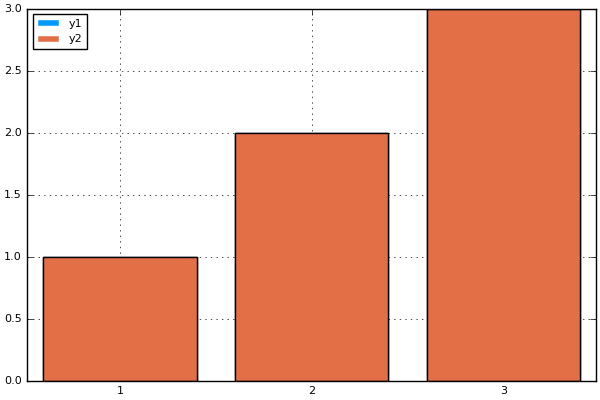

In [189]:
groupedbar([1,2,3],reshape([1,2,3],(3,1)))
groupedbar!([1,2,3],reshape([1,2,3],(3,1)))

In [133]:
savefig(s,"blocklearning.pdf")

In [343]:
savefig(s,"CISS/aa1hazard.html")

In [619]:
#map((fig,x,y,z1,z2) -> savefig(fig,"figures/$x$y$z1$z2.html"),s,x,y,z1,z2);
using Distributions


In [600]:
c0 = 1/10
c1 = 1/150
protocols = [(0.3,0.3),(0.9,0.3),(0.9,0.9)]
indexes = Array{Any,1}(3)
for (ind,protocol) in enumerate(protocols)
    z = map(t -> (prob(7,t,300,protocol...)[4]), rates)
    indexes[ind] = find(c0.> -diff(z)/(rates[2]-rates[1]) .>c1)
end

In [604]:
z = map(t -> (prob(7,t,300,protocols[1]...)[4]), rates)

100-element Array{Float64,1}:
 1.0     
 0.999998
 0.999987
 0.999951
 0.999859
 0.999671
 0.999338
 0.998805
 0.998016
 0.996921
 0.995472
 0.993629
 0.991361
 ⋮       
 0.425067
 0.419716
 0.414433
 0.409217
 0.404066
 0.398978
 0.393951
 0.388984
 0.384076
 0.379224
 0.374428
 0.369685

In [617]:
#plot(scatter(x = rates[1:end-1], y = -diff(z)/(rates[2]-rates[1])))

plot(ss)

In [22]:
selected_data[!selected_data[:Stim],:Stim]

1771-element DataArrays.DataArray{Bool,1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [380]:
savefig(s,"CISS/aa6stdbis.html")

In [63]:
function geteffbar(dd,k)
    aux = DataFrame(μ = mean(dd[dd[:Barrier] .== 1.,:AfterLast])-mean(dd[dd[:Barrier] .== 0.,:AfterLast]),
    σ = std(dd[dd[:Barrier] .== 1.,:AfterLast])-std(dd[dd[:Barrier] .== 0.,:AfterLast]))
    aux[:eff] = aux[:σ]-aux[:μ]*k
    aux[:pred] = aux[:μ]*k
    return aux
end

geteffbar (generic function with 1 method)

In [54]:
function geteff(dd,k)
    aux = DataFrame(μ = mean(dd[dd[:Stim],:AfterLast])-mean(dd[!dd[:Stim],:AfterLast]),
        σ = std(dd[dd[:Stim],:AfterLast])-std(dd[!dd[:Stim],:AfterLast]))
    aux[:eff] = aux[:σ]-aux[:μ]*k
    aux[:pred] = aux[:μ]*k
    return aux
end

geteff (generic function with 3 methods)

In [20]:
function geteffect(df)
    aux = by(df,[:Protocol,:MouseID]) do dd
        DataFrame(μ = mean(dd[!dd[:Stim],:AfterLast]),σ = std(dd[!dd[:Stim],:AfterLast]))
    end
    k = coef(lm(σ~1+μ,aux))[2]
    aux = by(df,[:Protocol,:MouseID]) do dd
        DataFrame(μ = mean(dd[dd[:Stim],:AfterLast])-mean(dd[!dd[:Stim],:AfterLast]),
        σ = std(dd[dd[:Stim],:AfterLast])-std(dd[!dd[:Stim],:AfterLast]))
    end
    aux[:eff] = aux[:σ]-aux[:μ]*k
    aux[:pred] = aux[:μ]*k
    return aux
end

geteff (generic function with 1 method)

In [15]:
using HypothesisTests
aux = geteffect(selected_data)
aux2 = by(aux,:MouseID) do df
    mean(df[:eff])
end
#pool!(aux,:Protocol)
#fit!(lmm(eff~1+(1|Protocol),aux))
OneSampleTTest(aux2[:x1])

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.23179533605300726
    95% confidence interval: (0.02202909464062186,0.44156157746539265)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.035392876173942704 (significant)

Details:
    number of observations:   7
    t-statistic:              2.70388004766312
    degrees of freedom:       6
    empirical standard error: 0.0857269301770028


In [177]:
using GLM
function getslope(df)
    aux = by(df,[:Protocol,:MouseID]) do dd
        DataFrame(μ = mean(dd[!dd[:Stim],:AfterLast]),σ = std(dd[!dd[:Stim],:AfterLast]))
    end
    lm(σ~1+μ,aux)
end
function getslopeff(df)
    aux = by(df,[:Protocol,:MouseID]) do dd
        DataFrame(μ = mean(dd[dd[:Stim],:AfterLast])-mean(dd[!dd[:Stim],:AfterLast]),
        σ = std(dd[dd[:Stim],:AfterLast])-std(dd[!dd[:Stim],:AfterLast]))
    end
    lin_fit = (lm(σ~1+μ,aux))
end
#getslope(selected_data)

getslopeff (generic function with 1 method)

In [87]:
# Reserved to 5-HT

cs = Dict()
cs[:ValidDay] = t -> t
cs[:Gen] = ["wt"]
cs[:StreakNumber] = t -> (10 <= t <= 60)
cs[:LastReward] = t -> (t>=1)
#cs[:Barrier] = [0]
rates = linspace(0.5,5,100)
#x = map(t -> (prob(7,t,100,0.3,0.3)[2]), rates)
#y = map(t -> prob(7,t,100,0.3,0.3)[3],rates);
colori = [colorant"#E24A33", colorant"#348ABD", colorant"#988ED5", colorant"#777777",
    colorant"#FBC15E",colorant"#8EBA42", colorant"#FFB5B8"]
selected_data = AT.choose_data(data[:streaks],cs)
traces = AT.getpermousesplit(colori,
selected_data,
[:Protocol], # split
dd -> geteffbar(dd,k)[:pred],
dd -> geteffbar(dd,k)[:σ])
#getslope)
#dd -> mean(dd[!dd[:Stim],:AfterLast]),
#dd -> mean(dd[dd[:Stim],:AfterLast]))
#dd -> getslope(dd[dd[:Stim],:]),
#dd -> getslope(dd[!dd[:Stim],:]))
#dd -> (std(dd[dd[:Stim],:AfterLast]))/(mean(dd[dd[:Stim],:AfterLast])+1),
#dd -> (std(dd[!dd[:Stim],:AfterLast]))/(mean(dd[!dd[:Stim],:AfterLast])+1))
#dd -> (std(dd[dd[:Stim],:AfterLast])-std(dd[!dd[:Stim],:AfterLast]))/(mean(dd[dd[:Stim],:AfterLast])-mean(dd[!dd[:Stim],:AfterLast])), # xaxis
#dd -> (std(dd[!dd[:Stim],:AfterLast]))/(mean(dd[!dd[:Stim],:AfterLast]))) # yaxis
l = Layout(;width = 700,
height = 500,
legend = attr(x = 0.85, y= 0.05),
xaxis = attr(autotick = true, ticks="", tick0=1, dtick=1),
yaxis = attr(autotick = true, ticks="", tick0=1, dtick=1),
#yaxis_range = [0,5],
font_size = 19,
showlegend = true)
traces[1].fields[:name] = "30-30" 
traces[2].fields[:name] = "90-30" 
traces[3].fields[:name] = "90-90" 
#traces[4].fields[:name] = "Barrier, 30-30" 
#traces[5].fields[:name] = "Barrier, 90-30" 
#traces[6].fields[:name] = "Barrier, 90-90"
push!(traces, scatter(;x =[-1.5,1.5], y = [-1.5,1.5], mode = "lines", showlegend = true, name = "",
line_color = colorant"gray", showlegend = false))
#push!(traces, scatter(;x = [-1;8], y = [0;3], mode = "lines", showlegend = false))
s = plot(traces,l)

restyle!(s; opacity = 0.8, marker_size = 8)
display(s)

In [88]:
savefig(s,"CISS/zznoexcessbarrier.html")

In [166]:
#(traces[1].fields[:y]-traces[1].fields[:y])
using HypothesisTests
OneSampleTTest(convert(Array,traces[1].fields[:y]-traces[1].fields[:x]))

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -0.021934366253485302
    95% confidence interval: (-0.0853620598704747,0.0414933273635041)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.42989990143021084 (not significant)

Details:
    number of observations:   7
    t-statistic:              -0.8461833888696105
    degrees of freedom:       6
    empirical standard error: 0.02592152781773077


In [11]:
cs = Dict()
cs[:ValidDay] = t -> t
cs[:Gen] = ["wt"]
cs[:StreakNumber] = t -> (10 <= t <= 60)
cs[:LastReward] = t -> (t>=1)
#cs[:Barrier] = [0]


rates = linspace(0.5,5,100)
x = map(t -> (prob(7,t,100,0.3,0.3)[2]), rates)
y = map(t -> prob(7,t,100,0.3,0.3)[3],rates);

colori = [colorant"#E24A33", colorant"#348ABD", colorant"#988ED5", colorant"#777777",
    colorant"#FBC15E",colorant"#8EBA42", colorant"#FFB5B8"]
selected_data = AT.choose_data(data[:streaks],cs)
traces = AT.getpermousesplit(colori,
selected_data,
[:Barrier,:Protocol], # split
dd -> mean(dd[:AfterLast]), # xaxis
dd -> std(dd[:AfterLast])) # yaxis
l = Layout(;width = 700,
height = 500,
legend = attr(x = 0.002, y= 1.04),
xaxis = attr( range = [0,10], autotick = false, ticks="", tick0=1, dtick=1),
yaxis = attr(range = [0,4],autotick = false, ticks="", tick0=1, dtick=1),
font_size = 19,
showlegend = false)
traces[1].fields[:name] = "No Barrier, 30-30" 
traces[2].fields[:name] = "No Barrier, 90-30" 
traces[3].fields[:name] = "No Barrier, 90-90" 
traces[4].fields[:name] = "Barrier, 30-30" 
traces[5].fields[:name] = "Barrier, 90-30" 
traces[6].fields[:name] = "Barrier, 90-90"
push!(traces, scatter(;x =x, y = y, mode = "lines", showlegend = true, name = "Poisson prediction",
line_color = colorant"gray"))
#xcol,ycol = AT.contorno(2:4, ) 
#push!(traces, scatter(; x))
for i = 1:3
    z = map(t -> (prob(7,t,300,protocols[i]...)[4]), rates)
    dz_dx = vcat(0,diff(z)./diff(x))
    x =  map(t -> (prob(7,t,300,protocols[i]...)[2]), rates)
    y  = 35*(1-z)+
    map(t -> (prob(7,t,300,protocols[i]...)[2]), rates)
    y = y - minimum(y)
    ss = scatter(x = x,y = 3*y, line_color = colori[i])
push!(traces,ss)
end
for i = 1:3
    z = map(t -> (prob(7,t,300,protocols[i]...)[4]), rates)
    x =  map(t -> (prob(7,t,300,protocols[i]...)[2]), rates)
    y  = 50*(1-z)+
    map(t -> (prob(7,t,300,protocols[i]...)[2]), rates)
    y = y - minimum(y)
    ss = scatter(x = x,y = 3*y, line_color = colori[i],line_dash ="dash")
push!(traces,ss)
end
#push!(traces, scatter(;x = [-1;8], y = [0;3], mode = "lines", showlegend = false))
s = plot(traces,l)

restyle!(s; opacity = 0.8, marker_size = 8)
display(s)

LoadError: LoadError: UndefVarError: protocols not defined
while loading In[11], in expression starting on line 38

In [55]:
savefig(s, "CISS/aa13meanvsstdandmessycurvessplitcorrected.html")

In [14]:
cs = Dict()
cs[:ValidDay] = t -> t
cs[:Gen] = ["wt"]
cs[:StreakNumber] = t -> (10 <= t <= 60)
cs[:LastReward] = t -> (t>=1)
#cs[:Barrier] = [0]


rates = linspace(0.5,5,100)
x = map(t -> (prob(7,t,100,0.3,0.3)[2]), rates)
y = map(t -> prob(7,t,100,0.3,0.3)[3],rates);
protocols = [(0.3,0.3),(0.9,0.3),(0.9,0.9)]
colori = [colorant"#E24A33", colorant"#348ABD", colorant"#988ED5", colorant"#777777",
    colorant"#FBC15E",colorant"#8EBA42", colorant"#FFB5B8"]
selected_data = AT.choose_data(data[:streaks],cs)
traces = AT.getpermousesplit(colori,
selected_data,
[:Barrier,:Protocol], # split
dd -> mean(dd[:AfterLast]), # xaxis
dd -> std(dd[:AfterLast])) # yaxis
l = Layout(;width = 700,
height = 500,
legend = attr(x = 0.002, y= 1.04),
xaxis = attr( range = [0,10], autotick = false, ticks="", tick0=1, dtick=1),
yaxis = attr(range = [0,4],autotick = false, ticks="", tick0=1, dtick=1),
font_size = 19,
showlegend = false)
traces[1].fields[:name] = "No Barrier, 30-30" 
traces[2].fields[:name] = "No Barrier, 90-30" 
traces[3].fields[:name] = "No Barrier, 90-90" 
traces[4].fields[:name] = "Barrier, 30-30" 
traces[5].fields[:name] = "Barrier, 90-30" 
traces[6].fields[:name] = "Barrier, 90-90"
#traces=traces[vcat(2:3,5:6)]

push!(traces, scatter(;x =x, y = y, mode = "lines", showlegend = true, name = "Poisson prediction",
line_color = colorant"gray"))

for i = 1:3
    x =  map(t -> (prob(7,t,300,protocols[i]...)[2]), rates)
    y  = map(t -> (prob(7,t,300,protocols[i]..., cost = 35)[6]), rates)
    y = y - minimum(y)
    coef = protocols[i][1]/protocols[i][2]
    ss = scatter(x = x,y = 3*y*coef, line_color = colori[i])
push!(traces,ss)
end
for i = 1:3
    x =  map(t -> (prob(7,t,300,protocols[i]...)[2]), rates)
    y  = map(t -> (prob(7,t,300,protocols[i]..., cost = 50)[6]), rates)
    y = y - minimum(y)
    coef = protocols[i][1]/protocols[i][2]
    ss = scatter(x = x,y = 3*y*coef, line_color = colori[i],line_dash ="dash")
push!(traces,ss)
end
#push!(traces, scatter(;x = [-1;8], y = [0;3], mode = "lines", showlegend = false))
s = plot(traces,l)

restyle!(s; opacity = 0.8, marker_size = 8)
display(s)

In [65]:
savefig(s,"CISS/aa20optimal3.html")

In [16]:
using Distributions
function prob(T, ρ, n, p, γ; cost = 0.) #add the fact that there could be reward!!!
    phnrw = zeros(Float64, n+1)
    plnrw = zeros(Float64, n+1)
    stay_cdf = zeros(Float64, n+1)
    stay_cdf[1] = 1.
    phnrw[1] = 1.
    plnrw[1] = 0.
    for i = 1:n
        phnrw[i+1] = phnrw[i]*(1-γ)*(1-p)
        plnrw[i+1] = phnrw[i]*γ+plnrw[i]
        stay_cdf[i+1] = cdf(Poisson(i*ρ),T)
    end
    leave_pdf = -diff(stay_cdf).*(phnrw+plnrw)[1:n]
    leave_correct = -diff(stay_cdf).*plnrw[1:n]
    rewarded = 1-sum(leave_pdf)
    leave_pdf, leave_correct = leave_pdf/sum(leave_pdf), leave_correct/sum(leave_pdf)
    confidence = sum(leave_correct)
    axis = collect(0:(n-1))
    v_mean = mean(axis,WeightVec(leave_pdf))
    v_std = std(axis,WeightVec(leave_pdf))
    wasted = sum(stay_cdf.*plnrw)
    costo = (1-rewarded)*cost*(1-confidence)+wasted
    return leave_pdf, v_mean, v_std, confidence, rewarded, costo
end

prob (generic function with 1 method)

In [8]:
cs = Dict()
cs[:DayNum] = vcat(2:4,6:8,10:12,15:17,19:21,23:25)
cs[:StreakNumber] = t -> (10 <= t <= 60)
cs[:Rewarded] = t -> ~t
selected_data = AT.choose_data(data[:pokes],cs)

colori = [colorant"blue", colorant"red", colorant"black"]
traces = AT.gethist_myplot(colori, selected_data,[:Protocollo],:Durations; nbins = 100)

l2 = Layout(;#title="Omission Plot",
xaxis=attr(range=[0, 12.0], title="Consecutive Omissions", showgrid=true),
yaxis_title="Cumulative", yaxis_showgrid=true)
#legend=attr(x=0.65, y=.1))

s = plot(traces)

LoadError: LoadError: KeyError: key :pokes not found
while loading In[8], in expression starting on line 5

In [679]:
cumsum([1,1,1])

3-element Array{Int64,1}:
 1
 2
 3

Distributions.Poisson{Float64}(λ=3.0)

g (generic function with 1 method)

In [77]:
using Optim
rosenbrock(x) =  (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
result = optimize(rosenbrock, 100*ones(2), NelderMead())

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [100.0,100.0]
 * Minimizer: [1.0000598790646333,1.0001233635809033]
 * Minimum: 4.881810e-09
 * Iterations: 254
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 376


In [18]:
using JuMP

m = Model()
@variable(m, 0 <= x <= 2 )
@variable(m, 0 <= y <= 30 )

@objective(m, Max, 5x + 3*y )
@constraint(m, 1x + 5y <= 3.0 )

print(m)

status = solve(m)

println("Objective value: ", getobjectivevalue(m))
println("x = ", getvalue(x))
println("y = ", getvalue(y))

INFO: Precompiling module JuMP.


Max 5 x + 3 y
Subject to
 x + 5 y ≤ 3
 0 ≤ x ≤ 2
 0 ≤ y ≤ 30


LoadError: LoadError: No LP solver detected. Try installing one of the following packages: "Clp",  "GLPKMathProgInterface",  "Gurobi",  "CPLEX",  "Mosek",  and restarting Julia
while loading In[18], in expression starting on line 12

In [34]:
push!(y,2)

In [31]:
t = slider(1:10)
y = signal(t)

5

In [19]:
selected_data

0×19 DataFrames.DataFrame

In [21]:
using PlotlyJS
using Colors
import AT
xline, yline = AT.contorno(collect(1:10),collect(1:10),1)
    alpha = 0.2
    s2 = scatter(;  x = xline,
                    y = yline,
                    line_width = 1,
                    mode = "lines",
                    fill = "tozeroy",
                    showlegend = false,
fillcolor = RGBA{Float64}(0.8862745098039215,0.2901960784313725,0.2,0.2),
                    name = "")
plot(s2)

In [16]:
plot(scatter(x = rand(10),y = rand(10), line_color = colorant"#E24A33"))

In [36]:
#data[:streaks][:Protocol] = convert(Array{Int64,1},data[:streaks][:Protocol])
lm(AfterLast ~ Side,data[:streaks])

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: AfterLast ~ 1 + Side

Coefficients:
              Estimate Std.Error t value Pr(>|t|)
(Intercept)    3.71367 0.0103315 359.452   <1e-99
Side: Right  0.0367655 0.0146135 2.51585   0.0119


In [69]:
for key in [:Protocol, :Barrier, :Side]
    selected_data[key] = PooledDataArray(selected_data[key])
end
test = selected_data[rand(size(selected_data,1)).> 0.9,:]
lm(AfterLast ~ 1+Barrier,test)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: AfterLast ~ 1 + Barrier

Coefficients:
              Estimate Std.Error t value Pr(>|t|)
(Intercept)    3.55781 0.0830419 42.8436   <1e-99
Barrier: 1.0  0.422491  0.116546  3.6251   0.0003


In [66]:
CategoricalArray(["Old", "Young", "Middle", "Young"], ordered=true)

4-element CategoricalArrays.CategoricalArray{String,1,UInt32}:
 "Old"   
 "Young" 
 "Middle"
 "Young" 

In [28]:
typeof(data[:streaks][:Side])

DataArrays.DataArray{String,1}

In [33]:
using RDatasets
iris = dataset("datasets","iris")
lm(SepalLength ~ Species, iris)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: SepalLength ~ 1 + Species

Coefficients:
                     Estimate Std.Error t value Pr(>|t|)
(Intercept)             5.006 0.0728022 68.7616   <1e-99
Species: versicolor      0.93  0.102958 9.03282   <1e-15
Species: virginica      1.582  0.102958 15.3655   <1e-31


In [34]:
typeof(iris[:Species])

DataArrays.PooledDataArray{String,UInt8,1}

In [ ]:
#minimum(selected_data[:Travel])
#selected_data[:Travel] = selected_data[:Travel]/1000
#savefig(s,"CISS/aa11curvesoverlap.html")
#dist = fit_mle(Gamma,selected_data[:NormAfterLast])
#dist2 = fit_mle(InverseGaussian,selected_data[:NormAfterLast])
#traces_new[1].fields[:x]
#using KernelDensity
#fitdist = kde(selected_data[:NormAfterLast])
plot(scatter(x = v, y = pdf(fitdist,v)))
#length(selected_data[:NormAfterLast])

LoadError: LoadError: syntax: space before "." not allowed in "[1,2,4] ."
while loading In[173], in expression starting on line 1

In [183]:
(in).([1,2,4],[[1,4,5]])

3-element Array{Bool,1}:
  true
 false
  true

In [184]:
map(t-> t in [1,4,5], [1,2,4])

3-element Array{Bool,1}:
  true
 false
  true

In [194]:
ncol(t)

22

In [92]:
scatter(rand(100),rand(100),rand(100))

In [14]:
plot(rand(100))

In [19]:
using Plots, Interact
gr()

function do_plots(f)
    @manipulate for i in 1:10
        plot(x->i*f(x), -5, 5)
    end
end

do_plots(x->x^2)

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"i",5,1:10,"d",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -5.0 
 
 
 -2.5 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
 
 25 
 
 
 50 
 
 
 75 
 
 
 100 
 
 
 125 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 30.6037,3.93701 36.3154,19.1776 42.0271,34.1072 47.7388,48.7257 53.4505,63.0332 59.1622,77.0297 64.8739,90.7151 70.5856,104.089 76.2974,117.153 82.0091,129.905 
 87.7208,142.346 93.4325,154.477 99.1442,166.296 104.856,177.804 110.568,189.001 116.279,199.888 121.991,210.463 127.703,220.727 133.414,230.68 139.126,240.322 
 144.838,249.653 150.55,258.673 156.261,267.382 161.973,275.779 167.685,283.866 173.396,291.642 179.108,299.107 184.82,306.261 190.532,313.103 196.243,319.635 
 201.955,325.856 207.667,331.765 213.378,337.364 219.09,342.651 224.802,347.628 230.514,352.293 236.225,356.648 241.937,360.691 247.649,364.424 253.36,367.845 
 259.072,370.955 264.784,373.755 270.496,376.243 276.207,378.42 281.919,380.286 287.631,381.842 293.342,383.086 299.054,384.019 304.766,384.641 310.477,384.952 
 316.189,384.952 321.901,384.641 327.613,384.019 333.324,383.086 339.036,381.842 344.748,380.286 350.459,378.42 356.171,376.243 361.883,373.755 367.595,370.955 
 373.306,367.845 379.018,364.424 384.73,360.691 390.441,356.648 396.153,352.293 401.865,347.628 407.577,342.651 413.288,337.364 419,331.765 424.712,325.856 
 430.423,319.635 436.135,313.103 441.847,306.261 447.559,299.107 453.27,291.642 458.982,283.866 464.694,275.779 470.405,267.382 476.117,258.673 481.829,249.653 
 487.54,240.322 493.252,230.68 498.964,220.727 504.676,210.463 510.387,199.888 516.099,189.001 521.811,177.804 527.522,166.296 533.234,154.477 538.946,142.346 
 544.658,129.905 550.369,117.153 556.081,104.089 561.793,90.7151 567.504,77.0297 573.216,63.0332 578.928,48.7257 584.64,34.1072 590.351,19.1776 596.063,3.93701 
 
 "/>
 
 
 
 
 y1

In [117]:
plot(rand(10), linetype = :bar)

In [124]:
plotlyjs()
StatPlots.shadederror(rand(100), shade = 0.1, group = rand([0,1],100))

In [125]:
type MyType end

@recipe function f(::MyType, n::Integer = 10; add_marker = false)
    linecolor   --> :blue
    seriestype  :=  :path
    markershape --> (add_marker ? :circle : :none)
    delete!(d, :add_marker)
    rand(n)
end

In [130]:
mt = MyType()
plot(
plot(mt, group = rand([0,1],10),linecolor = [:red :green]),
    plot(mt, 100, linecolor = :red),
    plot(mt, marker = (:star,20), add_marker = false),
    plot(mt, add_marker = true)
)

In [161]:
s[:RP] = [tuple([s[i,:Reward],s[i,:Protocollo]]...) for i in 1:size(s,1)]
density(s,:Duration, group = :RP, label = ["1" "2" "3" "4"])

In [7]:
@recipe function f(::Type{Val{:donsity}}, x, y, z; trim=false)
    newx, newy = StatPlots.violin_coords(y, trim=trim)
    if Plots.isvertical(d)
        newx, newy = newy, newx
    end
    print()
    x := newx
    y := newy
    seriestype := :path
    ()
end
@shorthands donsity

donsity! (generic function with 1 method)

In [12]:
donsity(rand(100),[88])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 86 
 
 
 88 
 
 
 90 
 
 
 0.1 
 
 
 0.2 
 
 
 0.3 
 
 
 0.4 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 30.6037,384.952 33.4452,384.946 36.2867,384.934 39.1282,384.916 41.9697,384.892 44.8112,384.861 47.6527,384.822 50.4942,384.776 53.3357,384.72 56.1772,384.655 
 59.0187,384.579 61.8602,384.491 64.7017,384.389 67.5432,384.273 70.3847,384.14 73.2262,383.989 76.0677,383.817 78.9092,383.622 81.7507,383.402 84.5923,383.153 
 87.4338,382.873 90.2753,382.559 93.1168,382.206 95.9583,381.812 98.7998,381.371 101.641,380.88 104.483,380.333 107.324,379.726 110.166,379.052 113.007,378.306 
 115.849,377.482 118.69,376.573 121.532,375.573 124.373,374.474 127.215,373.268 130.056,371.949 132.898,370.506 135.739,368.933 138.581,367.221 141.422,365.36 
 144.264,363.342 147.105,361.157 149.947,358.797 152.788,356.251 155.63,353.511 158.471,350.567 161.313,347.411 164.154,344.034 166.996,340.428 169.837,336.584 
 172.679,332.495 175.52,328.154 178.362,323.555 181.203,318.693 184.045,313.564 186.886,308.163 189.728,302.489 192.569,296.54 195.411,290.316 198.252,283.819 
 201.094,277.053 203.935,270.02 206.777,262.729 209.618,255.186 212.46,247.401 215.301,239.386 218.143,231.154 220.984,222.719 223.826,214.099 226.667,205.313 
 229.509,196.381 232.35,187.325 235.192,178.17 238.033,168.94 240.875,159.664 243.716,150.369 246.558,141.086 249.399,131.845 252.241,122.68 255.082,113.621 
 257.924,104.704 260.766,95.961 263.607,87.4273 266.449,79.1365 269.29,71.1227 272.132,63.4192 274.973,56.059 277.815,49.0738 280.656,42.4944 283.498,36.3503 
 286.339,30.6691 289.181,25.477 292.022,20.798 294.864,16.654 297.705,13.0645 300.547,10.0465 303.388,7.61456 306.23,5.78024 309.071,4.55241 311.913,3.93701 
 314.754,3.93701 317.596,4.55241 320.437,5.78024 323.279,7.61456 326.12,10.0465 328.962,13.0645 331.803,16.654 334.645,20.798 337.486,25.477 340.328,30.6691 
 343.169,36.3503 346.011,42.4944 348.852,49.0738 351.694,56.059 354.535,63.4192 357.377,71.1227 360.218,79.1365 363.06,87.4273 365.901,95.961 368.743,104.704 
 371.584,113.621 374.426,122.68 377.267,131.845 380.109,141.086 382.95,150.369 385.792,159.664 388.633,168.94 391.475,178.17 394.316,187.325 397.158,196.381 
 399.999,205.313 402.841,214.099 405.682,222.719 408.524,231.154 411.365,239.386 414.207,247.401 417.048,255.186 419.89,262.729 422.731,270.02 425.573,277.053 
 428.414,283.819 431.256,290.316 434.097,296.54 436.939,302.489 439.78,308.163 442.622,313.564 445.463,318.693 448.305,323.555 451.146,328.154 453.988,332.495 
 456.829,336.584 459.671,340.428 462.512,344.034 465.354,347.411 468.195,350.567 471.037,353.511 473.878,356.251 476.72,358.797 479.561,361.157 482.403,363.342 
 485.244,365.36 488.086,367.221 490.927,368.933 493.769,370.506 496.61,371.949 499.452,373.268 502.293,374.474 505.135,375.573 507.976,376.573 510.818,377.482 
 513.659,378.306 516.501,379.052 519.342,379.726 522.184,380.333 525.025,380.88 527.867,381.371 530.708,381.812 533.55,382.206 536.391,382.559 539.233,382.873 
 542.074,383.153 544.916,383.402 547.757,383.622 550.599,383.817 553.44,383.989 556.282,384.14 559.123,384.273 561.965,384.389 564.806,384.491 567.648,384.579 
 570.489,384.655 573.331,384.72 576.172,384.776 579.014,384.822 581.855,384.861 584.697,384.892 587.538,384.916 590.38,384.934 593.221,384.946 596.063,384.952 
 
 "/>
 
 
 
 
 y1

In [173]:
Val{:donsity}::Type{Val{:donsity}}

Val{:donsity}

In [3]:
using Plots
using StatPlots
gr()
donsity(rand(100))

LoadError: LoadError: UndefVarError: donsity not defined
while loading In[3], in expression starting on line 4

In [123]:
#reload("StatPlots")
@recipe function f(::Type{Val{:PopulationAnalysis}}, x, y, z; analysisfunc = KernelDensity.kde)
    dens =  analysisfunc(y)
    newx = dens.x
    newy= dens.density
    x=newx
    y = newy
    @series begin
        seriestype  := :shadederror
        shade       := 0.01
        x           := x
        y           := y
        ()
    end
end
@shorthands PopulationAnalysis

PopulationAnalysis! (generic function with 1 method)

In [125]:
s = PopulationAnalysis(t,:AfterLast, group = :Protocollo, fillalpha = 0.1)

In [82]:
s.series_list[2].fillrange

LoadError: LoadError: type Series has no field fillrange
while loading In[82], in expression starting on line 1

In [83]:
shadederror(1:10,rand(10), shade = 0.1)

In [129]:
xline, yline = StatPlots.border(x,y,shade)

    # line plot
    @series begin
        primary := true
        x := x
        y := y
        seriestype := :path
        ()
    end

    @series begin
        # shaded error bar
        primary := false
        fillrange := 0
        fillalpha --> 0.5
        linewidth := 0
        x := xline
        y := yline
        seriestype := :path
        ()
    end
end
@shorthands PopulationAnalysis

Pop! (generic function with 1 method)

In [1]:
using Plots
gr()
import StatPlots
#reload("StatPlots")
s = StatPlots.Pop(1:10,rand(10))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2 
 
 
 4 
 
 
 6 
 
 
 8 
 
 
 10 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 
 
 y1

In [14]:
s.series_list[1].mark

1-element Array{Plots.Series,1}:
 Plots.Series(Dict{Symbol,Any}(Pair{Symbol,Any}(:markerstrokecolor,RGBA{Float64}(0.0,0.0,0.0,1.0)),Pair{Symbol,Any}(:quiver,nothing),Pair{Symbol,Any}(:levels,15),Pair{Symbol,Any}(:bar_width,nothing),Pair{Symbol,Any}(:fillcolor,RGBA{Float64}(0.0,0.605603,0.97868,1.0)),Pair{Symbol,Any}(:arrow,nothing),Pair{Symbol,Any}(:linewidth,4),Pair{Symbol,Any}(:line_z,nothing),Pair{Symbol,Any}(:primary,true),Pair{Symbol,Any}(:orientation,:vertical)…))

In [73]:
using Interact
@manipulate for span in 0:0.05:1
    df = StatPlots.groupapply(:AfterLast,x,:BlockNumber;
    compute_error = :none, group = [:Choice, :Protocollo], axis_type = :continuous, span = span);
    plot(df, linestyle = [:dash :dash :solid :solid], color = [:blue :red], xlims = (0,40), legend = false)
end

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.5, nactions=1),"span",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.05"=>0.05,"0.1"=>0.1,"0.15"=>0.15,"0.2"=>0.2,"0.25"=>0.25,"0.3"=>0.3,"0.35"=>0.35,"0.4"=>0.4,"0.45"=>0.45…),Dict(1.0=>"1.0",0.95=>"0.95",0.3=>"0.3",0.45=>"0.45",0.25=>"0.25",0.35=>"0.35",0.7=>"0.7",0.0=>"0.0",0.85=>"0.85",0.15=>"0.15"…)),Any[],Any[],true,"horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 40 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:0.8; stroke-opacity:1; fill:none" stroke-dasharray="8, 5" points="
 49.2187,186.991 66.0306,163.872 82.8425,145.007 99.6545,130.051 116.466,118.537 133.278,110.189 150.09,105.379 166.902,107.368 183.714,111.999 200.526,109.672 
 217.338,101.864 234.15,91.4548 250.962,79.8072 267.774,71.6156 284.585,63.0236 301.397,56.7111 318.209,51.967 335.021,49.2681 351.833,48.4588 368.645,48.2333 
 385.457,48.3863 402.269,47.8117 419.081,48.7268 435.893,50.0645 452.705,51.5003 469.516,52.4985 486.328,52.8857 503.14,52.352 519.952,51.0124 536.764,48.9274 
 553.576,45.2109 570.388,40.8623 587.2,35.6973 604.012,29.753 620.824,24.5265 637.635,20.5763 654.447,17.1776 671.259,15.3479 688.071,13.6466 704.883,12.2888 
 721.695,11.6168 738.507,10.3393 755.319,8.99117 772.131,7.50112 788.943,6.16124 805.755,5.07128 822.566,4.30861 839.378,3.93701 856.19,4.0835 873.002,4.54266 
 889.814,5.2984 906.626,6.31981 923.438,7.57148 940.25,9.05005 957.062,10.8064 973.874,12.8561 990.686,15.0816 1007.5,17.47 1024.31,20.0991 1041.12,22.8409 
 1057.93,25.6367 1074.75,28.5154 1091.56,31.523 1108.37,34.4716 1125.18,37.3277 1141.99,40.2096 1158.8,42.9524 1175.62,45.4695 1192.43,47.8162 1209.24,50.1558 
 1226.05,52.2399 1242.86,54.033 1259.68,55.4996 1276.49,57.3041 1293.3,59.3756 1310.11,61.3284 1326.92,63.1463 1343.74,64.8128 1360.55,66.3116 1377.36,67.6263 
 1394.17,68.7404 1410.98,69.6377 1427.8,70.3018 1444.61,70.7162 1461.42,70.8645 1478.23,70.7304 1495.04,70.2976 1511.85,69.5496 1528.67,68.47 1545.48,67.0425 
 1562.29,65.2506 1579.1,63.0781 1595.91,60.5085 1612.73,57.5254 1629.54,54.1124 1646.35,50.2532 1663.16,45.9314 1679.97,41.1306 1696.79,35.8345 
 "/>
<polygon clip-path="url(#clip02)" points="
49.2187,186.991 66.0306,163.872 82.8425,145.007 99.6545,130.051 116.466,118.537 133.278,110.189 150.09,105.379 166.902,107.368 183.714,111.999 200.526,109.672 
 217.338,101.864 234.15,91.4548 250.962,79.8072 267.774,71.6156 284.585,63.0236 301.397,56.7111 318.209,51.967 335.021,49.2681 351.833,48.4588 368.645,48.2333 
 385.457,48.3863 402.269,47.8117 419.081,48.7268 435.893,50.0645 452.705,51.5003 469.516,52.4985 486.328,52.8857 503.14,52.352 519.952,51.0124 536.764,48.9274 
 553.576,45.2109 570.388,40.8623 587.2,35.6973 604.012,29.753 620.824,24.5265 637.635,20.5763 654.447,17.1776 671.259,15.3479 688.071,13.6466 704.883,12.2888 
 721.695,11.6168 738.507,10.3393 755.319,8.99117 772.131,7.50112 788.943,6.16124 805.755,5.07128 822.566,4.30861 839.378,3.93701 856.19,4.0835 873.002,4.54266 
 889.814,5.2984 906.626,6.31981 923.438,7.57148 940.25,9.05005 957.062,10.8064 973.874,12.8561 990.686,15.0816 1007.5,17.47 1024.31,20.0991 1041.12,22.8409 
 1057.93,25.6367 1074.75,28.5154 1091.56,31.523 1108.37,34.4716 1125.18,37.3277 1141.99,40.2096 1158.8,42.9524 1175.62,45.4695 1192.43,47.8162 1209.24,50.1558 
 1226.05,52.2399 1242.86,54.033 1259.68,55.4996 1276.49,57.3041 1293.3,59.3756 1310.11,61.3284 1326.92,63.1463 1343.74,64.8128 1360.55,66.3116 1377.36,67.6263 
 1394.17,68.7404 1410.98,69.6377 1427.8,70.3018 1444.61,70.7162 1461.42,70.8645 1478.23,70.7304 1495.04,70.2976 1511.85,69.5496 1528.67,68.47 1545.48,67.0425 
 1562.29,65.2506 1579.1,63.0781 1595.91,60.5085 1612.73,57.5254 1629.54,54.1124 1646.35,50.2532 1663.16,45.9314 1679.97,41.1306 1696.79,35.8345 1696.79,35.8345 
 1679.97,41.1306 1663.16,45.9314 1646.35,50.2532 1629.54,54.1124 1612.73,57.5254 1595.91,60.5085 1579.1,63.0781 1562.29,65.2506 1545.48,67.0425 1528.67,68.47 
 1511.85,69.5496 1495.04,70.2976 1478.23,70.7304 1461.42,70.8645 1444.61,70.7162 1427.8,70.3018 1410.98,69.6377 1394.17,68.7404 1377.36,67.6263 1360.55,66.3116 
 1343.74,64.8128 1326.92,63.1463 1310.11,61.3284 1293.3,59.3756 1276.49,57.3041 1259.68,55.4996 1242.86,54.033 1226.05,52.2399 1209.24

In [3]:
foldername =  string("/Users/",ENV["USER"],"/Google Drive/Flipping/run_task/")
gen_list = [BuildTable.acc]
data = BuildTable.getpokes(gen_list, foldername)

filepath does not exist
/Users/pietro/Google Drive/Flipping/run_task/raw_data/F01_170403a.csv


54017×27 DataFrames.DataFrame
│ Row   │      │ PokeIn  │ PokeOut │ Reward │ Side │ SideHigh │ Protocollo │
├───────┼──────┼─────────┼─────────┼────────┼──────┼──────────┼────────────┤
│ 1     │ 0    │ 57.034  │ 57.154  │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 2     │ 1    │ 88.258  │ 89.291  │ 1.0    │ 1.0  │ 1.0      │ 0.0        │
│ 3     │ 2    │ 90.38   │ 92.863  │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 4     │ 3    │ 95.285  │ 96.361  │ 1.0    │ 1.0  │ 1.0      │ 0.0        │
│ 5     │ 4    │ 105.461 │ 105.802 │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 6     │ 5    │ 121.036 │ 121.221 │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 7     │ 6    │ 135.089 │ 136.938 │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 8     │ 7    │ 171.44  │ 172.974 │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 9     │ 8    │ 194.131 │ 195.028 │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 10    │ 9    │ 205.15  │ 206.252 │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 11    │ 10   │ 206.4   │ 206.537 │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
⋮
│ 54006 │ 1100 │ 1510.11 │ 1510.41 │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 54007 │ 1101 │ 1510.45 │ 1510.92 │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 54008 │ 1102 │ 1510.97 │ 1511.28 │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 54009 │ 1103 │ 1512.3  │ 1512.86 │ 0.0    │ 0.0  │ 0.0      │ 0.0        │
│ 54010 │ 1104 │ 1512.91 │ 1513.95 │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 54011 │ 1105 │ 1513.97 │ 1514.37 │ 0.0    │ 0.0  │ 0.0      │ 0.0        │
│ 54012 │ 1106 │ 1514.38 │ 1514.64 │ 0.0    │ 0.0  │ 0.0      │ 0.0        │
│ 54013 │ 1107 │ 1514.67 │ 1514.96 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 54014 │ 1108 │ 1515.01 │ 1515.65 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 54015 │ 1109 │ 1515.69 │ 1516.29 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 54016 │ 1110 │ 1516.32 │ 1516.64 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 54017 │ 1111 │ 1516.7  │ 1516.94 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │

│ Row   │ Stim │ ProbVec0 │ ProbVec1 │ GamVec0 │ GamVec1 │ delta │
├───────┼──────┼──────────┼──────────┼─────────┼─────────┼───────┤
│ 1     │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 2     │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 3     │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 4     │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 5     │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6     │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 7     │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 8     │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 9     │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 10    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 11    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
⋮
│ 54006 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54007 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54008 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54009 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54010 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54011 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54012 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54013 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54014 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54015 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54016 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 54017 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │

│ Row   │ FlippingGamma │ RewardProb │ StreakNumber │ Test File         │
├───────┼───────────────┼────────────┼──────────────┼───────────────────┤
│ 1     │ 30.0          │ 90.0       │ 1            │ "F01_170330a.txt" │
│ 2     │ 30.0          │ 90.0       │ 2            │ "F01_170330a.txt" │
│ 3     │ 30.0          │ 90.0       │ 3            │ "F01_170330a.t

6234×27 DataFrames.DataFrame
│ Row  │      │ PokeIn  │ PokeOut │ Reward │ Side │ SideHigh │ Protocollo │
├──────┼──────┼─────────┼─────────┼────────┼──────┼──────────┼────────────┤
│ 1    │ 0    │ 5.525   │ 7.027   │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 2    │ 1    │ 11.922  │ 12.566  │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 3    │ 2    │ 13.124  │ 15.822  │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 4    │ 3    │ 18.658  │ 19.043  │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 5    │ 4    │ 19.254  │ 19.587  │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 6    │ 5    │ 20.651  │ 21.521  │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 7    │ 6    │ 21.696  │ 22.056  │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 8    │ 7    │ 23.93   │ 24.828  │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
│ 9    │ 8    │ 25.388  │ 25.695  │ 0.0    │ 0.0  │ 0.0      │ 0.0        │
│ 10   │ 9    │ 27.287  │ 27.949  │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 11   │ 10   │ 28.601  │ 28.952  │ 1.0    │ 0.0  │ 0.0      │ 0.0        │
⋮
│ 6223 │ 1543 │ 1515.23 │ 1515.57 │ 0.0    │ 0.0  │ 0.0      │ 0.0        │
│ 6224 │ 1544 │ 1515.64 │ 1515.92 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 6225 │ 1545 │ 1516.03 │ 1516.64 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 6226 │ 1546 │ 1516.69 │ 1516.92 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 6227 │ 1547 │ 1517.02 │ 1517.14 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 6228 │ 1548 │ 1517.2  │ 1517.4  │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 6229 │ 1549 │ 1517.5  │ 1517.66 │ 0.0    │ 0.0  │ 1.0      │ 0.0        │
│ 6230 │ 1550 │ 1518.91 │ 1520.09 │ 1.0    │ 1.0  │ 1.0      │ 0.0        │
│ 6231 │ 1551 │ 1520.13 │ 1520.67 │ 0.0    │ 1.0  │ 1.0      │ 0.0        │
│ 6232 │ 1552 │ 1520.69 │ 1520.87 │ 0.0    │ 1.0  │ 1.0      │ 0.0        │
│ 6233 │ 1553 │ 1520.92 │ 1521.22 │ 0.0    │ 1.0  │ 0.0      │ 0.0        │
│ 6234 │ 1554 │ 1521.31 │ 1521.47 │ 0.0    │ 1.0  │ 0.0      │ 0.0        │

│ Row  │ Stim │ ProbVec0 │ ProbVec1 │ GamVec0 │ GamVec1 │ delta │
├──────┼──────┼──────────┼──────────┼─────────┼─────────┼───────┤
│ 1    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 2    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 3    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 4    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 5    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 7    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 8    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 9    │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 10   │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 11   │ 0.0  │ 90.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
⋮
│ 6223 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6224 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6225 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6226 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6227 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6228 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6229 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6230 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6231 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6232 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6233 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │
│ 6234 │ 0.0  │ 30.0     │ 90.0     │ 30.0    │ 90.0    │ 0.0   │

│ Row  │ FlippingGamma │ RewardProb │ StreakNumber │ Test File         │
├──────┼───────────────┼────────────┼──────────────┼───────────────────┤
│ 1    │ 30.0          │ 90.0       │ 1            │ "F08_170330a.txt" │
│ 2    │ 30.0          │ 90.0       │ 2            │ "F08_170330a.txt" │
│ 3    │ 30.0          │ 90.0       │ 2            │ "F08_170330a.txt" │
│ 4    │ 30.0          │ 90.0       │ 2           

In [20]:
sel_streaks = @from i in data begin
    @where i.MouseID == "F08"
    @select i
    @collect DataFrame
end

weight = by(sel_streaks, :DayNum) do df
    DataFrame(rews = 4*sum(df[:Reward]), w = mean(df[:Weight]))
end

7×3 DataFrames.DataFrame
│ Row │ DayNum │ rews  │ w    │
├─────┼────────┼───────┼──────┤
│ 1   │ 1.0    │ 508.0 │ 20.0 │
│ 2   │ 2.0    │ 936.0 │ 19.0 │
│ 3   │ 3.0    │ 884.0 │ 19.0 │
│ 4   │ 4.0    │ 980.0 │ 19.0 │
│ 5   │ 5.0    │ 712.0 │ 19.0 │
│ 6   │ 6.0    │ 744.0 │ 19.0 │
│ 7   │ 7.0    │ 768.0 │ 18.0 │